## Observations and Insights 

In [27]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice.
number_of_mice = len(study_data_complete["Mouse ID"].unique())
number_of_mice


249

In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

duplicate_rows

array(['g989'], dtype=object)

In [30]:
# Optional: Get all the data for the duplicate mouse ID. 

All_rows_of_duplicated_mouseId = study_data_complete[study_data_complete["Mouse ID"] == "g989"]
All_rows_of_duplicated_mouseId

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_rows)==False]
#study_data_complete
#study_data_complete.drop_duplicates(subset = ['Mouse ID','Timepoint'], keep=False, inplace=True)

#study_data_complete
#cleanDF = study_data_complete
cleanDF.head(5)
#cleanDF.to_excel('clean.xlsx', sheet_name='Sheet1')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(cleanDF["Mouse ID"].unique())
number_of_mice

248

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

drug_regimenDF = cleanDF.groupby("Drug Regimen")
#print(drug_regimenDF["Mouse ID"].count())

# mean, median, variance, standard deviation, and SEM of the tumor volume.

average_tumor_volume = drug_regimenDF["Tumor Volume (mm3)"].mean()
median_tumor_volume = drug_regimenDF["Tumor Volume (mm3)"].median()
variance = drug_regimenDF["Tumor Volume (mm3)"].var()
std_dev = drug_regimenDF["Tumor Volume (mm3)"].std()
sem = drug_regimenDF["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
regimen_summaryDF = pd.DataFrame({"Mean Tumor Volume" : average_tumor_volume,
                                "Median Tumor Volume" : median_tumor_volume,
                                "Tumor Volume Variance" : variance,
                                "Tumor Volume Std. Dev." : std_dev,
                                "Tumor Volume Std. Err." : sem})
regimen_summaryDF                   


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#["Tumor Volume (mm3)"]
# Using the aggregation method, produce the same summary statistics in a single line
agg_summaryDF = cleanDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
agg_summaryDF                                       

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [35]:
cleanDF.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested_data = cleanDF.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
mice_tested_data
#len(mice_tested_data)
#mice_tested_data = cleanDF.groupby("Drug Regimen") ['Mouse ID']["Timepoint"].sum()
#mice_tested_data

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

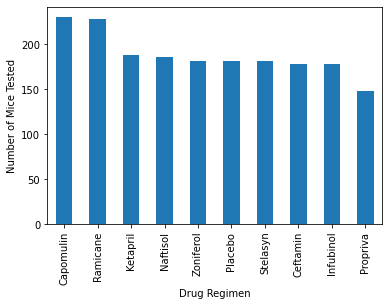

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas's `DataFrame.plot()` method.
mice_tested_chart = mice_tested_data.plot(kind='bar')

# Set the xlabel and ylabel using class methods
mice_tested_chart.set_xlabel("Drug Regimen")
mice_tested_chart.set_ylabel("Number of Mice Tested")

plt.savefig("output/bar_plot_usingDFPlot.png")
plt.show()
#plt.tight_layout()


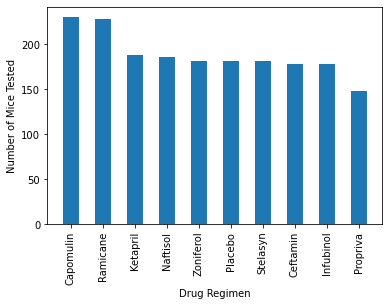

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
miceTestedData = cleanDF.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)

#miceTestedData
x_axis = np.arange(len(mice_tested_data))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
tick_locations
plt.xticks(tick_locations, miceTestedData.index, rotation = "vertical")
plt.bar(x_axis, miceTestedData, color="tab:blue", align="center", width=.5)

# Set a Title and labels
#plt.title("Average Rain per State")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.savefig("output/bar_plot_usingPyplot.png")
plt.show()

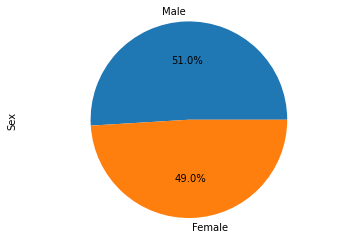

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sexDF = cleanDF[["Mouse ID","Sex"]]
#mice_sexDF

mice_sex_count = mice_sexDF["Sex"].value_counts()
mice_sex_count

mice_sex_distribution_chart = mice_sex_count.plot(kind='pie', autopct='%.1f%%')
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()
#plt.tight_layout()

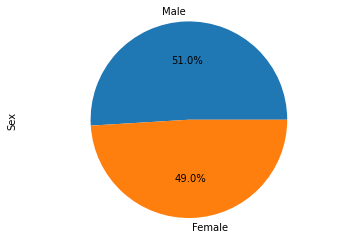

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex_count, autopct="%1.1f%%", labels = mice_sex_count.index )
plt.axis("equal")
plt.ylabel("Sex")

plt.savefig("output/pie_plot.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Regimen_subsetDF = cleanDF[["Drug Regimen"] in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
#Regimen_subsetDF.head(5)
# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = cleanDF.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(greatest_timepoint, cleanDF, how="inner", on=["Mouse ID", "Timepoint"])
merged_data.head(5)

#merged_data.to_excel('merged_data.xlsx', sheet_name='Sheet1')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [79]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#create a dataframe with data corresponds to four treatments in the treatment_list
tumor_DF = merged_data['Drug Regimen'].isin(treatment_list)
tumor_volume_data = merged_data[tumor_DF]

for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #tumor_volume_DF = merged_data.loc[merged_data['Drug Regimen'] == drug] ['Tumor Volume (mm3)']
    tumor_volume_DF = tumor_volume_data.loc[tumor_volume_data['Drug Regimen'] == drug] ['Tumor Volume (mm3)']
    
    # add subset 
    #tumor_volume_data.append(tumor_volume_DF)
    tumor_volume_list.append(tumor_volume_DF) 
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume_DF.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume_DF.loc[(tumor_volume_DF < lower_bound) | (tumor_volume_DF > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


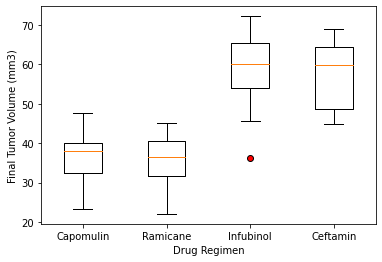

In [81]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_dot = dict(markerfacecolor='r', marker='o')
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
#ax1.boxplot(tumor_volume_data, flierprops=red_dot)
ax1.boxplot(tumor_volume_list, flierprops=red_dot)
ax1.xaxis.set(ticks=range(1,len(treatment_list)+1), ticklabels = treatment_list)

plt.savefig("output/box_plot.png")
plt.show()

## Line and Scatter Plots

['l897']


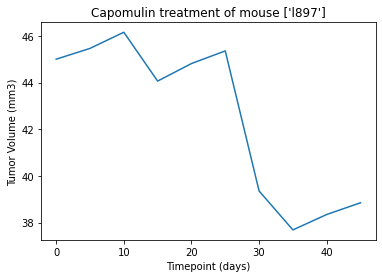

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_month,Weight (g)
0,l897,0,45.000000,0,Capomulin,Male,17,19
1,l897,5,45.462243,0,Capomulin,Male,17,19
2,l897,10,46.154737,0,Capomulin,Male,17,19
3,l897,15,44.061521,0,Capomulin,Male,17,19
4,l897,20,44.813093,0,Capomulin,Male,17,19
5,l897,25,45.354679,0,Capomulin,Male,17,19
6,l897,30,39.352792,1,Capomulin,Male,17,19
7,l897,35,37.682767,1,Capomulin,Male,17,19
8,l897,40,38.343902,1,Capomulin,Male,17,19
9,l897,45,38.846876,1,Capomulin,Male,17,19


In [47]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# select a random mouse treated with Capomulin
mouse_treated_withCapomulin = (cleanDF[cleanDF['Drug Regimen'] == 'Capomulin']).sample()
# get the data for the random mouse
random_mouse_data = pd.merge(cleanDF, mouse_treated_withCapomulin, how="inner", on=["Mouse ID"])
# remove the columns with '_y'
random_mouseDF = random_mouse_data.drop([col for col in random_mouse_data.columns 
                                         if '_y' in col], axis=1)



random_mouseDF = random_mouseDF.rename(columns={"Timepoint_x":"Timepoint",
                                                        "Timepoint_x":"Timepoint",
                                                        "Tumor Volume (mm3)_x":"Tumor Volume (mm3)",
                                                        "Metastatic Sites_x":"Metastatic Sites",
                                                        "Drug Regimen_x":"Drug Regimen",
                                                        "Sex_x":"Sex",
                                                        "Age_months_x":"Age_month",
                                                        "Weight (g)_x":"Weight (g)"})


tumorVolume = random_mouseDF['Tumor Volume (mm3)']
timePoint = random_mouseDF['Timepoint']
label = random_mouseDF['Mouse ID'].unique()
label_value = str(label)

print(label_value)
title = "Capomulin treatment of mouse " + str(label_value)

lineChart, = plt.plot(timePoint, tumorVolume)

plt.title(title)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig("output/line_plot.png")
plt.show()
random_mouseDF.head(20)

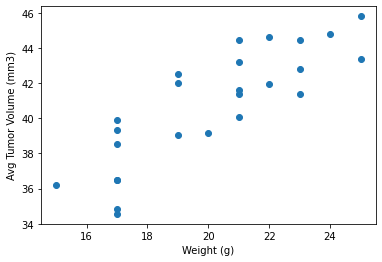

In [77]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
CapomulinDF = cleanDF.loc[cleanDF['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = CapomulinDF.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_weight = CapomulinDF.groupby("Mouse ID")["Weight (g)"].mean()

avg_vol_weight = pd.merge(avg_tumor_volume,avg_weight, on = "Mouse ID", how="inner")

plt.scatter(avg_vol_weight.iloc[:,1],avg_vol_weight.iloc[:,0])
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')

plt.savefig("output/scatter_plot.png")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
